In [1]:
import tweepy
import pandas as pd

In [2]:
consumer_key = "cTBT1n87ukBpmM0QuCC3bGOwO"
consumer_secret = "tRq379XcJxGGi1IymKLOo9aDt4fkZAw04By0Vqfpot0N3EKEq8"
access_token = "436497459-tBgNtry64Zqzka11KVsxxJAnJo7GMLz0wriWYF3m"
access_token_secret = "aGL6TQzck6QRbDosDXXuHweOOSWTodkf3OxNPOCQhFY06"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# 20 Tweet @jokowi

In [1]:
user ='jokowi'
n_tweet = 20

hasil = api.user_timeline(id=user, count=n_tweet, result_type='recent',tweet_mode='extended')
list_hasil = []
for tweet in hasil:
    list_hasil.append(tweet.full_text)
df_raw = pd.Series(list_hasil)
df_raw

NameError: name 'api' is not defined

# Pre-Processing

In [4]:
import re

def clean_data(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #menghapus @mention
    text = re.sub('#', '', text) #menghapus hashtag
    text = re.sub('RT[\s]+', '', text) #menghapus RT
    text = re.sub('https?:\/\/\S+', '', text) #menghapus hyperlink
    text = re.sub('\d+', '', text) #menghapus angka
    text = re.sub('[^\w\s]', '', text) #menghapus tanda baca
    text = re.sub(r'\b[a-zA-Z]\b', '', text) #menghapus single character
    text = re.sub('\n', '', text) #menghapus \n
    text = text.strip() #menghaous spasi
    text = text.lower() #lowercase
    return text

In [5]:
df_clean = df_raw.apply(clean_data)

In [6]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import itertools

def clean_stopwords(text):
    #dari data series
    text = [word_tokenize(paragraf) for paragraf in text]
    text = list(itertools.chain(*text))
    indo = stopwords.words('indonesian')
    data = [word for word in text if word not in indo]
    return data

In [7]:
data = clean_stopwords(df_clean)

In [8]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemmer_(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    hasil_stem = []
    for i in range(len(text)):
        output   = stemmer.stem(text[i])
        hasil_stem.append(output)
    hasil = pd.Series(hasil_stem)
    return hasil

# Top Words & Wordcloud

In [9]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud

fqdist = FreqDist(data)
fqdist.most_common(10)

[('indonesia', 9),
 ('pelabuhan', 6),
 ('pemerintah', 5),
 ('membangun', 5),
 ('tri', 5),
 ('pandemi', 4),
 ('adi', 4),
 ('utarini', 4),
 ('masyarakat', 3),
 ('program', 3)]

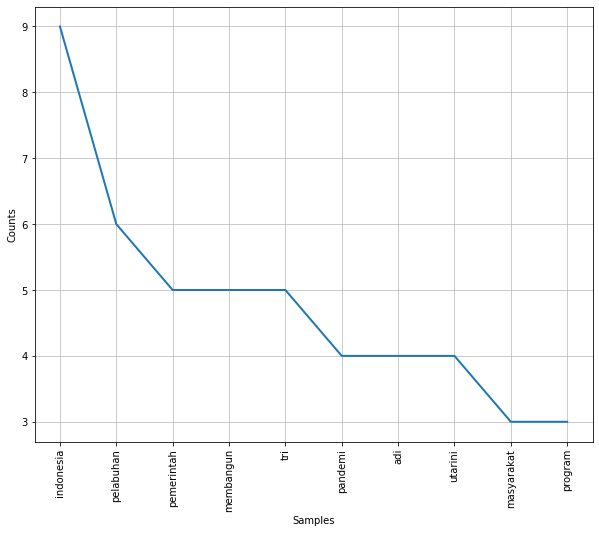

In [10]:
plt.figure(figsize=[10,8])
fqdist.plot(10,cumulative=False)
plt.show()

In [11]:
paragraf_baru = ' '.join(data)

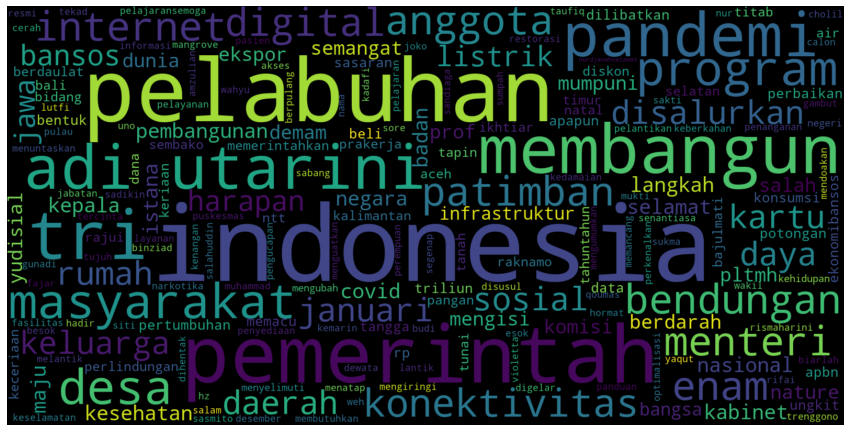

In [12]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(paragraf_baru)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()